### The Distance Modulus and Dark Energy
Astronomers measure the brightness of Supernovae in terms of Distance Modulus ($\mu$).
$$\mu = m - M = 5 \log_{10}(d_L) + 25$$
By plotting $\mu$ against redshift $z$, we can see if the universe is expanding at a constant rate or accelerating.

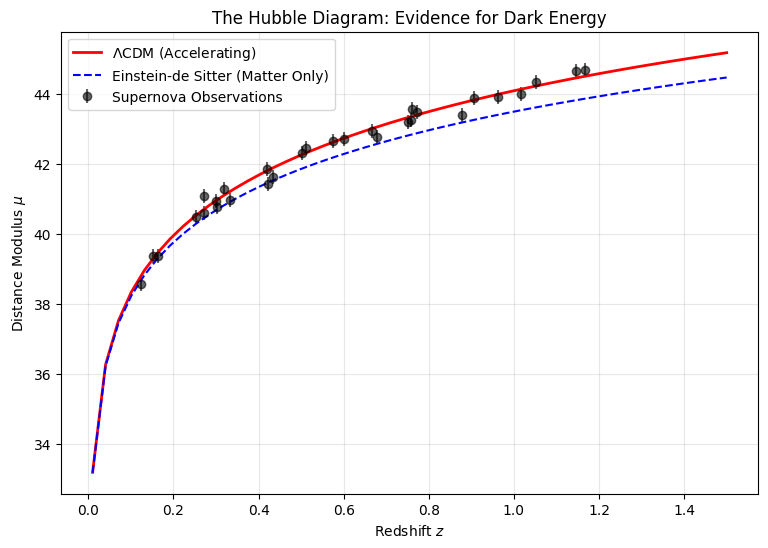

In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from src.physics_engine import CosmologyEngine

# Define Models
lcdm = CosmologyEngine(H0=70, Om0=0.3, Ol0=0.7)
matter_only = CosmologyEngine(H0=70, Om0=1.0, Ol0=0.0)

z_vals = np.linspace(0.01, 1.5, 50)
mu_lcdm = [lcdm.distance_modulus(z) for z in z_vals]
mu_matter = [matter_only.distance_modulus(z) for z in z_vals]

# Generate Mock Data (with some noise to look real)
np.random.seed(42)
z_data = np.sort(np.random.uniform(0.1, 1.2, 30))
mu_data = [lcdm.distance_modulus(z) + np.random.normal(0, 0.2) for z in z_data]

plt.figure(figsize=(9, 6))
plt.errorbar(z_data, mu_data, yerr=0.2, fmt='o', color='black', label='Supernova Observations', alpha=0.6)
plt.plot(z_vals, mu_lcdm, label='$\Lambda$CDM (Accelerating)', color='red', lw=2)
plt.plot(z_vals, mu_matter, label='Einstein-de Sitter (Matter Only)', color='blue', linestyle='--')

plt.xlabel("Redshift $z$")
plt.ylabel("Distance Modulus $\mu$")
plt.title("The Hubble Diagram: Evidence for Dark Energy")
plt.legend()
plt.grid(alpha=0.3)
plt.show()